Creating the boxplots of genomic category 
for each sample after normalizing to the total reference genome count for each genomic category
03.04.2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd /mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/eccDNA/

/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/eccDNA


In [4]:
ref_len = pd.read_csv('/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/Reference_genome/hg38_annotations_length.csv',index_col=0)

In [5]:
ref_len

,Length
Enhancers,18373598
Promoters,250181000
5UTRs,21642541
Exons,429812038
Introns,9797944035
Intronexonboundaries,589102800
3UTRs,109032607
Intergenic,1139532537


In [6]:
TT = pd.read_csv('samplewise_annotation_tt.csv',sep='\t',index_col=0)
NAT = pd.read_csv('samplewise_annotation_NAT.csv',sep='\t',index_col=0)

In [7]:
TT

,Enhancers,3UTRs,5UTRs,Exons,Intergenic,Intronexonboundaries,Introns,Promoters
Sample,,,,,,,,
CRCtx031,2329,2492,1291,8781,16633,7759,26749,4359
CRCtx022,7812,7899,4392,27972,49765,24445,83020,14046
CRCtx050,8599,9775,4701,34411,63879,29910,110086,16338
CRCtx046,13345,14300,6443,51574,98946,44743,178160,23557
CRCtx034,14657,18500,7620,65325,142131,55724,242773,30022
CRCtx030,14817,18917,7904,63865,152310,54945,264678,30212
CRCtx024,16099,20939,8799,73588,180908,62453,308527,35134
CRCtx028,16182,17050,8689,59124,120109,51446,200867,29212
CRCtx032,17101,20968,9009,73097,166849,62851,281843,34111


In [7]:
tt_prt = np.zeros((TT.shape))
tt_prt=pd.DataFrame(tt_prt)
tt_prt.index=TT.index
tt_prt.columns=TT.columns

In [8]:
NAT.shape
nat_prt = np.zeros((NAT.shape))
nat_prt=pd.DataFrame(nat_prt)
nat_prt.index=NAT.index
nat_prt.columns=NAT.columns

In [9]:
for i in TT.columns:
    l = (ref_len.loc[i,'Length'])/ref_len['Length'].sum()
    for j in TT.index:
        k= TT.loc[j,i]
        tt_prt.loc[j,i]= (k/l)*100
        

In [10]:
for i in NAT.columns:
    l = (ref_len.loc[i,'Length'])/ref_len['Length'].sum()
    for j in NAT.index:
        k= NAT.loc[j,i]
        nat_prt.loc[j,i]= (k/l)*100

In [11]:
from scipy.stats import f_oneway

In [12]:
tt_prt.columns

Index(['Enhancers', '3UTRs', '5UTRs', 'Exons', 'Intergenic',
       'Intronexonboundaries', 'Introns', 'Promoters'],
      dtype='object')

In [13]:
f_oneway(tt_prt,nat_prt)

F_onewayResult(statistic=array([84.67780673, 81.97259524, 76.28382835, 84.32566966, 80.28043009,
       84.87551423, 78.94016005, 80.21482496]), pvalue=array([5.35076673e-12, 8.70405963e-12, 2.50790130e-11, 5.69729274e-12,
       1.18637156e-11, 5.16592133e-12, 1.52075095e-11, 1.20080394e-11]))

In [14]:
for i in tt_prt.index:
    tt_prt.loc[i,'SType']='TT'

/tmp/ipykernel_1186/3044125485.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'TT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tt_prt.loc[i,'SType']='TT'


In [15]:
for i in nat_prt.index:
    nat_prt.loc[i,'SType']='NAT'

/tmp/ipykernel_1186/3503650699.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NAT' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  nat_prt.loc[i,'SType']='NAT'


In [58]:
cdf = pd.concat([tt_prt,nat_prt])    

In [59]:
cdf = cdf.T

In [60]:
cdf

,CRCtx031,CRCtx022,CRCtx050,CRCtx046,CRCtx034,CRCtx030,CRCtx024,CRCtx028,CRCtx032,CRCtx029,...,CRCnx032,CRCnx028,CRCnx047,CRCnx021,CRCnx037,CRCnx026,CRCnx029,CRCnx027,CRCnx035,CRCnx055
Enhancers,156617346.653192,525330490.362704,578253569.71696,897405964.399678,985633512.192288,996392969.240167,1082603118.8363,1088184587.179887,1149984218.598644,1258184008.536379,...,262329012.148606,271003824.393458,281090815.375845,314848611.863566,383171164.1176,466086229.992819,485318759.465903,517933363.642287,552901599.047895,633933759.939735
3UTRs,28239449.434381,89511802.199909,110770713.571858,162048205.020724,209642782.719118,214368244.36203,237281633.911114,193211321.370863,237610263.138079,262257455.160462,...,42075873.093842,45010872.05191,53566563.995312,58303357.680533,75822695.090466,80060878.914085,81704025.04891,96243035.331539,86837440.214951,114226986.476147
5UTRs,73702560.676198,250737139.031651,268377798.403413,367827729.23063,435022085.47841,451235507.036923,502330620.751251,496050774.372954,514319418.382546,548687304.925591,...,120858498.025957,121771930.226437,129821551.493163,148604001.115525,181887186.920501,219394996.652694,224761410.830512,246112888.516723,254048330.758389,317075152.591482
Exons,25242361.725298,80409901.170714,98919816.573196,148257551.94403,187786958.171632,183589959.183028,211540247.653028,169961211.09743,210128791.143847,233755595.724217,...,38077704.52264,41464050.281938,48998525.863536,52655089.365936,66582801.763052,71742810.793562,69549447.62349,85983860.786402,75019919.592883,95501849.588641
Intergenic,18034680.012629,53958747.720105,69262149.012611,107284281.15972,154108525.51404,165145320.310442,196153303.175901,130230708.930254,180909536.789948,213353094.49679,...,26751134.808609,29943228.715732,40139713.465252,42576070.465696,56461245.253271,53494679.72002,47702503.88719,67376601.69451,50627867.121368,59216377.936015
Intronexonboundaries,16273435.56157,51270026.07328,62732112.082299,93842289.899642,116873427.404681,115239582.024805,130986579.601331,107900910.671546,131821329.872436,147171925.938312,...,24620938.272621,26475006.71397,30975946.61797,33390010.844206,41945152.441788,45607147.349702,44346632.493083,54468503.870856,48040087.83835,61326879.213855
Introns,3373161.850295,10469172.56015,13882309.449009,22466728.298198,30614700.432973,33377013.428999,38906557.485733,25330176.880749,35541592.409907,39987648.986072,...,4888430.189042,5880113.795558,7469153.104526,8016823.743272,11072455.161063,10110406.046857,9130576.237264,13257084.713364,9508510.592393,12094782.093671
Promoters,21527675.010894,69368599.037167,80688037.23973,116340316.63951,148268836.700402,149207184.544419,173515332.37732,144268511.681172,168463070.038219,185160722.988857,...,33829909.113242,35597953.998284,40136594.359608,43687500.148283,55732923.261742,61955651.069434,61461783.783109,73605980.353833,67161012.267296,84362409.849985
SType,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,...,NAT,NAT,NAT,NAT,NAT,NAT,NAT,NAT,NAT,NAT


In [61]:
cdf1 =cdf.reindex(['Enhancers',  '5UTRs','3UTRs', 'Exons', 'Promoters','Intergenic',
       'Intronexonboundaries', 'Introns','SType' ])

In [62]:
cdf1 = cdf1.T

In [63]:
cdf1

,Enhancers,5UTRs,3UTRs,Exons,Promoters,Intergenic,Intronexonboundaries,Introns,SType
CRCtx031,156617346.653192,73702560.676198,28239449.434381,25242361.725298,21527675.010894,18034680.012629,16273435.56157,3373161.850295,TT
CRCtx022,525330490.362704,250737139.031651,89511802.199909,80409901.170714,69368599.037167,53958747.720105,51270026.07328,10469172.56015,TT
CRCtx050,578253569.71696,268377798.403413,110770713.571858,98919816.573196,80688037.23973,69262149.012611,62732112.082299,13882309.449009,TT
CRCtx046,897405964.399678,367827729.23063,162048205.020724,148257551.94403,116340316.63951,107284281.15972,93842289.899642,22466728.298198,TT
CRCtx034,985633512.192288,435022085.47841,209642782.719118,187786958.171632,148268836.700402,154108525.51404,116873427.404681,30614700.432973,TT
CRCtx030,996392969.240167,451235507.036923,214368244.36203,183589959.183028,149207184.544419,165145320.310442,115239582.024805,33377013.428999,TT
CRCtx024,1082603118.8363,502330620.751251,237281633.911114,211540247.653028,173515332.37732,196153303.175901,130986579.601331,38906557.485733,TT
CRCtx028,1088184587.179887,496050774.372954,193211321.370863,169961211.09743,144268511.681172,130230708.930254,107900910.671546,25330176.880749,TT
CRCtx032,1149984218.598644,514319418.382546,237610263.138079,210128791.143847,168463070.038219,180909536.789948,131821329.872436,35541592.409907,TT
CRCtx029,1258184008.536379,548687304.925591,262257455.160462,233755595.724217,185160722.988857,213353094.49679,147171925.938312,39987648.986072,TT


In [64]:
mdf = pd.melt(cdf1, id_vars=['SType'], var_name=['Sample'])

In [65]:
mdf

,SType,Sample,value
0,TT,Enhancers,156617346.653192
1,TT,Enhancers,525330490.362704
2,TT,Enhancers,578253569.71696
3,TT,Enhancers,897405964.399678
4,TT,Enhancers,985633512.192288
...,...,...,...
379,NAT,Introns,10110406.046857
380,NAT,Introns,9130576.237264
381,NAT,Introns,13257084.713364
382,NAT,Introns,9508510.592393


/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Figure size 640x480 with 0 Axes>

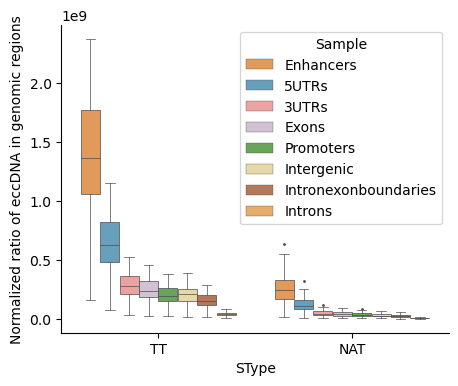

In [68]:
plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9);
fig, ax = plt.subplots(1,1, figsize=(5,4)) ;
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
my_pal=['#f79944','#5aa4ca','#f79795','#d2bed6','#63b04f','#f1de9e','#c0754a','#fbad56']
ax = sns.boxplot(x="SType", y="value", hue="Sample", data=mdf, palette=my_pal,linewidth=0.5,
                 fliersize=1,flierprops={"marker": "o"})
plt.ylabel('Normalized ratio of eccDNA in genomic regions')
plt.savefig('Normalized_genomic_annotations_TT_NAT.pdf',dpi=300)
plt.show()